In [1]:
import geopandas as geo
import matplotlib.pyplot as plt

In [2]:
import geopandas as geo

a = geo.read_file('Export_Output.shx', enabled_drivers=['GeoJSON', 'ESRI Shapefile']) #import shapefile (must be .shx not .shp)
im = a['GRID_CODE'].values.reshape(300,380)   #reshape data from x,y,z to a grid
plt.imshow(im, extent=(a['x'].min(), a['x'].max(), a['y'].min(), a['y'].max() )) #plot raster as image


In [3]:
b = (a['x'].max() - a['x'].min())/50      #calculate number of cols
c = (a['y'].max() - a['y'].min())/50     #calculate number of rows
print('x:',b,' y:',c)

x: 379.0  y: 299.0


In [4]:
im = a['GRID_CODE'].values.reshape(300,380)   #reshape data from x,y,z to a grid

In [9]:
a['x'].min(), a['x'].max(), a['y'].min(), a['y'].max(), a['GRID_CODE'].max()

(575012.5, 593962.5, 5238037.5, 5252987.5, 2381)

<IPython.core.display.Javascript object>


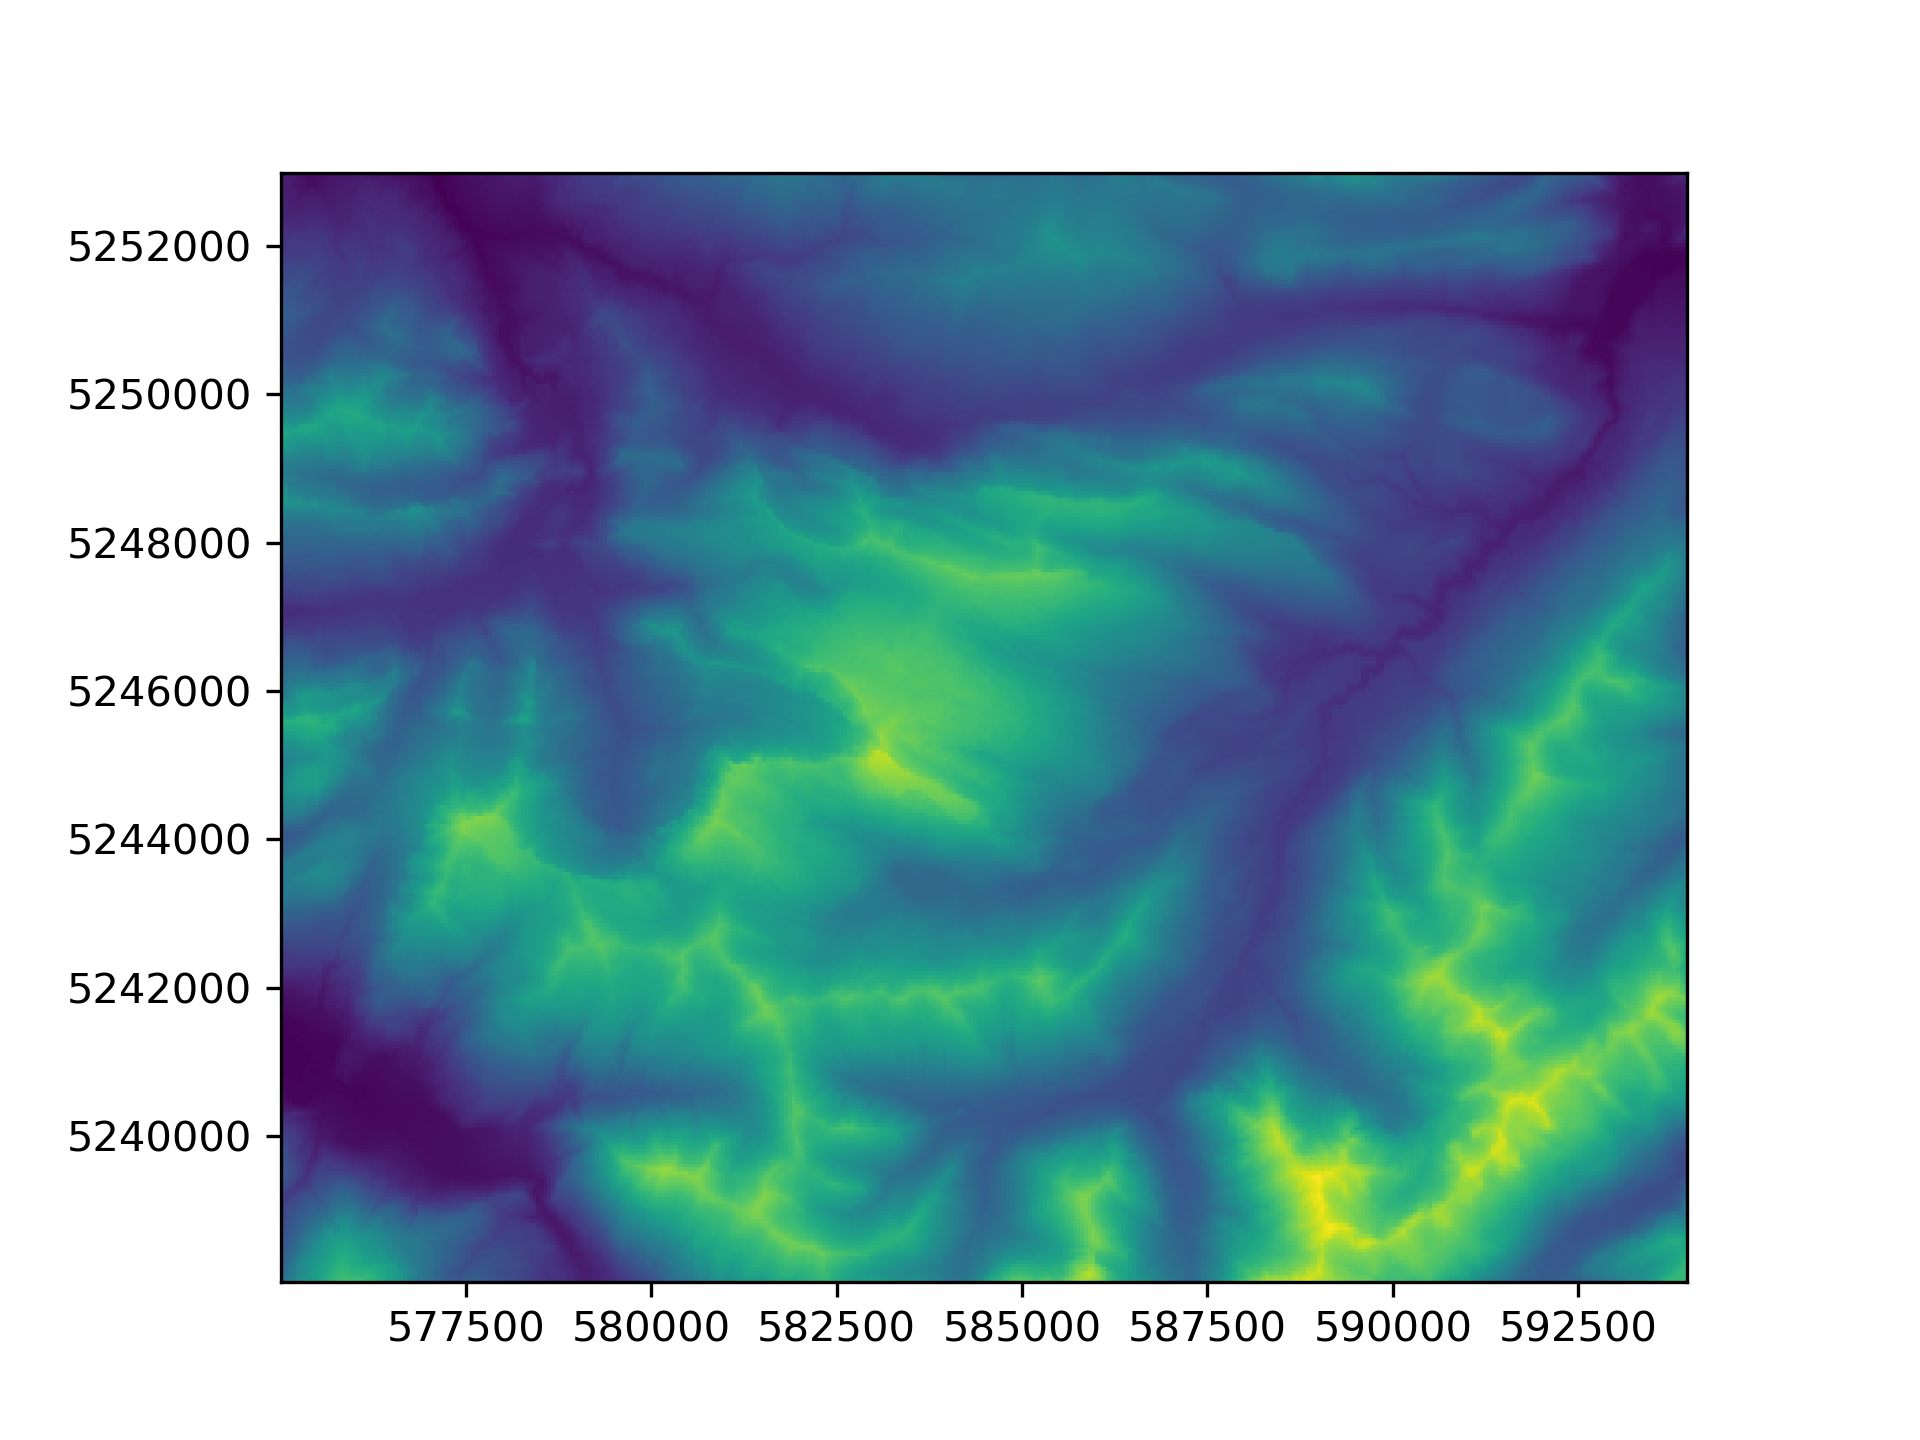

In [5]:
#make interactive (magic):
%matplotlib notebook  
#%matplotlib inline                   

plt.imshow(im, extent=(a['x'].min(), a['x'].max(), a['y'].min(), a['y'].max() )) #plot raster as image
plt.show()

In [20]:
import bokeh
bokeh.io.output_notebook()

AttributeError: module 'bokeh' has no attribute 'io'

In [21]:
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Column
from bokeh.io import curdoc
from bokeh.events import DoubleTap

coordList=[]

TOOLS = "tap,reset"
bound = 10
p = figure(title='Double click to leave a dot.',
           tools=TOOLS,width=700,height=700,
           x_range=(-bound, bound), y_range=(-bound, bound))

source = ColumnDataSource(data=dict(x=[], y=[]))   
p.circle(source=source,x='x',y='y') 

#add a dot where the click happened
def callback(event):
    Coords=(event.x,event.y)
    coordList.append(Coords) 
    source.data = dict(x=[i[0] for i in coordList], y=[i[1] for i in coordList])        
p.on_event(DoubleTap, callback)

layout=Column(p)

curdoc().add_root(layout)

In [22]:
bokeh.plotting.show(p)

W-1004 (BOTH_CHILD_AND_ROOT): Models should not be a document root if they are in a layout box: Figure(id='7bc27250-a63a-4fec-813e-35bfb084604a', ...)
